In [313]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from joblib import load
import random
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from lime import lime_tabular

In [314]:
WINDOW_LENGTH = 5
STEPS_FORECAST = 3
path_models = r"S:\csgo-ml-master\models"
path_mlready_data = r"S:\csgo-ml-master\data\mlready3"

In [315]:
def reshape_dataframe(df, target_col):
    X_data = df.drop(target_col, axis=1).to_numpy()
    num_features = int(X_data.shape[1] / WINDOW_LENGTH)
    X_data = X_data.reshape(X_data.shape[0], WINDOW_LENGTH, num_features)
    y_data = df[target_col].to_numpy()
    return X_data, y_data

In [316]:
folder = f"winSize-{WINDOW_LENGTH}_forecSteps-{STEPS_FORECAST}"

path_train_data = os.path.join(path_mlready_data, folder, 'train')

In [317]:
path = r"S:\csgo-ml-master\data\mlready3\winSize-5_forecSteps-3\test"
match = "young-ninjas-vs-saw-youngsters-m1-nuke"
round_num = 22

fullpath = os.path.join(path, match, str(round_num))
player_list = os.listdir(fullpath)

In [318]:
df = pd.read_parquet(os.path.join(fullpath, player_list[0]))
target_col = f"forecast_dead-{STEPS_FORECAST}"
X, y = reshape_dataframe(df, target_col)
num_features = X.shape[2]

In [ ]:
model_filename = 'model_wl5_nf50_sf3_LSTM_FINAL_20211129-1937'

model_fullfile = os.path.join(path_models,model_filename)
model_LSTM = tf.keras.models.load_model(model_fullfile)
model_LSTM.summary()

In [321]:
player_num = 1
df_results = pd.DataFrame()
for player in player_list:
    fullfile = os.path.join(fullpath, player)
    df = pd.read_parquet(fullfile)
    X, y = reshape_dataframe(df, target_col)
    y_pred_p = model_LSTM.predict_on_batch(X)

    col_name_y = f"y_Player-{player_num}"
    col_name_y_pred = f"y_pred_Player-{player_num}"
    
    df_results.loc[:, col_name_y] = y
    df_results.loc[:, col_name_y_pred] = y_pred_p

    player_num += 1

df_results

,y_Player-1,y_pred_Player-1,y_Player-2,y_pred_Player-2,y_Player-3,y_pred_Player-3,y_Player-4,y_pred_Player-4,y_Player-5,y_pred_Player-5,y_Player-6,y_pred_Player-6,y_Player-7,y_pred_Player-7,y_Player-8,y_pred_Player-8,y_Player-9,y_pred_Player-9,y_Player-10,y_pred_Player-10
0,0.0,1.319399e-03,0.0,1.340191e-03,0.0,1.022362e-03,0.0,0.000885,0.0,1.117467e-03,0.0,9.821811e-04,0.0,0.002162,0.0,8.849996e-04,0.0,1.180782e-03,0.0,1.457725e-03
1,0.0,6.212961e-03,0.0,7.779049e-03,0.0,2.959662e-03,0.0,0.001070,0.0,1.070467e-03,0.0,1.006300e-03,0.0,0.001997,0.0,6.696757e-03,0.0,1.486862e-03,0.0,1.503953e-03
2,0.0,2.267051e-02,0.0,2.555380e-02,0.0,1.087283e-02,0.0,0.001298,0.0,5.930024e-03,0.0,4.620487e-03,0.0,0.002186,0.0,1.656218e-02,0.0,1.633735e-03,0.0,7.694813e-03
3,0.0,3.084152e-02,0.0,2.235551e-02,0.0,1.813702e-02,0.0,0.000117,0.0,1.148166e-02,0.0,9.197165e-03,0.0,0.002225,0.0,2.084790e-02,0.0,1.730899e-02,0.0,1.198186e-02
4,0.0,2.753410e-02,0.0,2.704331e-02,0.0,9.721313e-03,0.0,0.001911,0.0,1.294350e-02,0.0,2.338022e-02,0.0,0.001902,0.0,2.094602e-02,0.0,2.132648e-02,0.0,1.756377e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,4.895713e-15,0.0,9.509653e-16,0.0,3.846150e-15,0.0,0.006475,0.0,1.716355e-15,0.0,1.121832e-15,0.0,0.007739,0.0,5.272163e-16,0.0,6.668911e-16,0.0,8.021444e-16
73,0.0,5.809236e-15,0.0,9.234069e-16,0.0,3.666537e-15,0.0,0.007319,0.0,1.747092e-15,0.0,1.134662e-15,0.0,0.014256,0.0,5.002201e-16,0.0,6.901345e-16,0.0,8.081921e-16
74,0.0,6.382169e-15,0.0,1.075019e-15,0.0,3.543901e-15,0.0,0.007352,0.0,1.890939e-15,0.0,1.235636e-15,0.0,0.013856,0.0,5.082835e-16,0.0,7.742656e-16,0.0,8.163164e-16
75,0.0,6.347909e-15,0.0,1.023484e-15,0.0,3.773212e-15,0.0,0.010802,0.0,1.911296e-15,0.0,1.243970e-15,0.0,0.017865,0.0,5.099207e-16,0.0,7.254598e-16,0.0,7.704883e-16


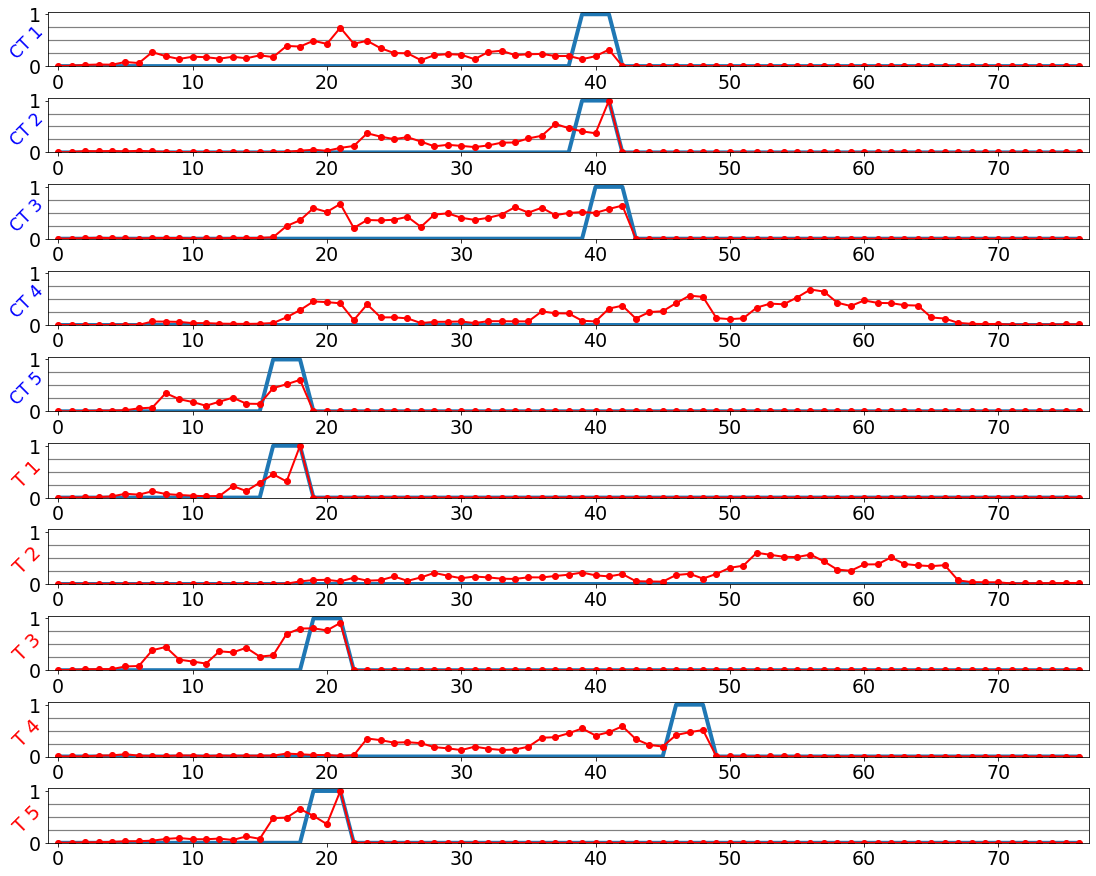

In [322]:
fig, axs = plt.subplots(len(player_list), figsize = (15, 12))


for ii in range(len(player_list)):
    axs[ii].set_ylim([0, 1.05])
    axs[ii].plot(df_results[df_results.columns[2*ii]], linewidth=4)
    #print(df_results.columns[2*ii+1])
    axs[ii].plot(df_results[df_results.columns[2*ii+1]], marker='o', linewidth=2, color='red')
left, width = -.02, .45
bottom, height = -.02, .45
right = left + width
top = bottom + height
pcount = 0
for ax in axs:
    plt.rc('xtick',labelsize=19)
    plt.rc('ytick',labelsize=19)
    ax.margins(x=0.01)
    ax.axhline(y=0.25, c="grey",linewidth=1.2,zorder=0)
    ax.axhline(y=0.5, c="grey",linewidth=1.2,zorder=0)
    ax.axhline(y=0.75, c="grey",linewidth=1.2,zorder=0)
    ax.set_yticks([0,1])
    pcount += 1
    if pcount < 6:
        ax.text(left, top, f'CT {pcount}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=17,
            color='blue',
            rotation=45,
            transform=ax.transAxes)
    if pcount > 5:
        ax.text(left, top, f'T {pcount-5}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=19,
            color='red',
            rotation=45,
            transform=ax.transAxes)
    
    #ax.set_yticks([0,0.25,0.5,0.75,1])

fig.tight_layout(pad=0.1)
#plt.legend(['y true', 'y pred'])
#plt.title(f"Forecastdead for {STEPS_FORECAST} steps")

In [284]:
fig.savefig('m2-r22.png')